Resultado da classificação: 95.48
Resultado da classificação Boba: 61.06


<AxesSubplot:>

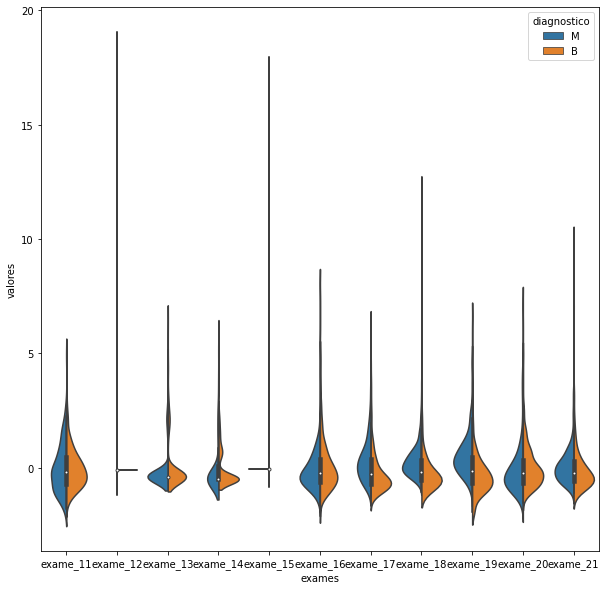

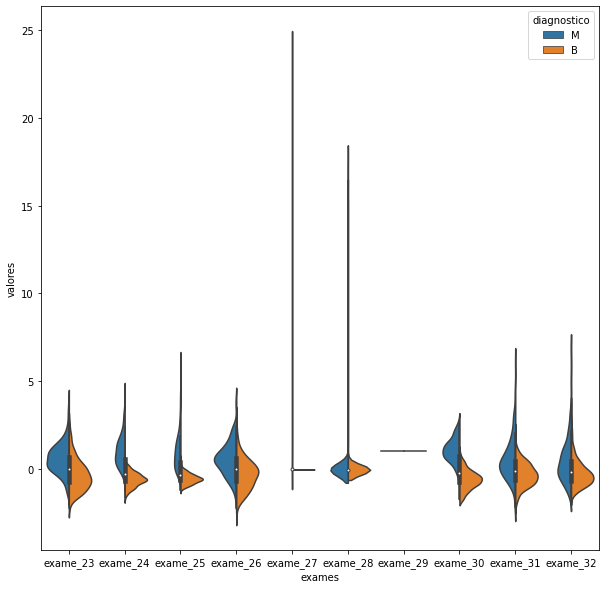

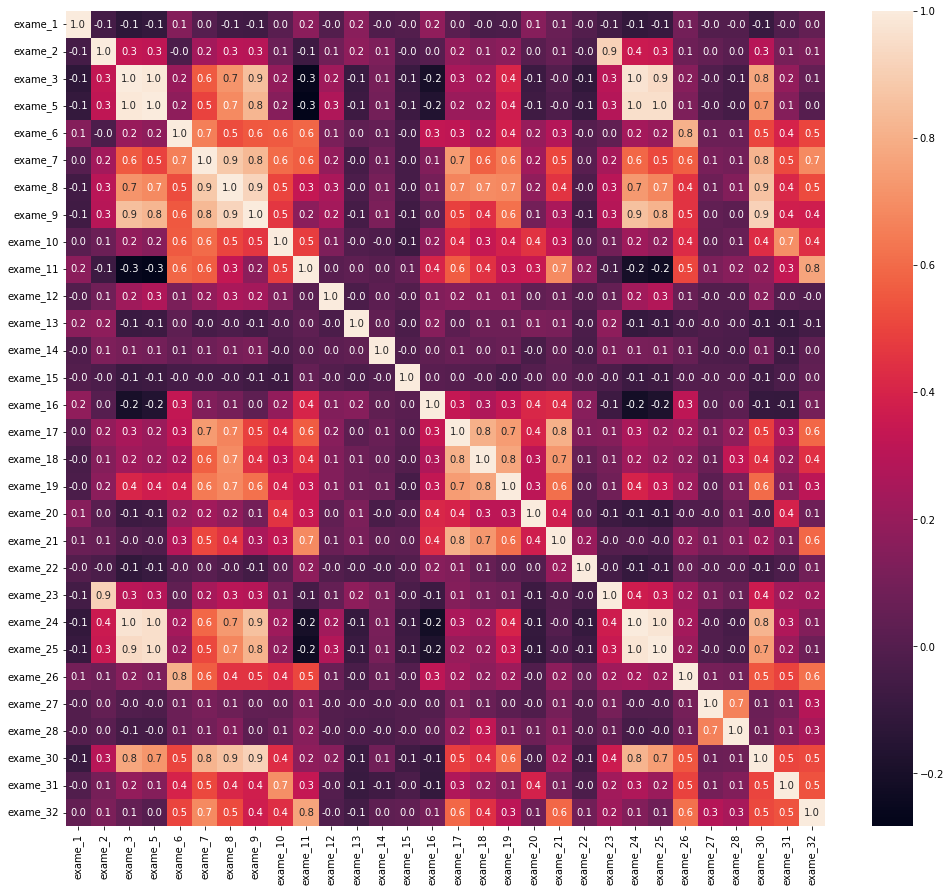

In [5]:
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random

SEED = 123143
random.seed(SEED)

df = pd.read_excel('../ML_Classificacao/resource/exames.xlsx')

valores_exames = df.drop(columns=['id', 'diagnostico', 'exame_33'])
diagnostico = df.diagnostico

teste_x, treino_x, teste_y, treino_y = train_test_split(valores_exames,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
score = classificador.score(teste_x, teste_y) * 100
print('Resultado da classificação: %.2f' % score)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
score_bobo = classificador_bobo.score(teste_x, teste_y) * 100
print('Resultado da classificação Boba: %.2f' % score_bobo)


pradonizador = StandardScaler()
pradonizador.fit(valores_exames)
valores_exames_v2 = pradonizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2,
                                 columns=valores_exames.columns)

valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])


def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames',
                         value_name='valores')

    plt.figure(figsize=(10, 10))
    sns.violinplot(x='exames', y='valores', hue='diagnostico',
                   data=dados_plot, split=True)


grafico_violino(valores_exames_v2, 10, 21)
grafico_violino(valores_exames_v2, 22, 32)

matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')
